# Домашнее задание 3. 

## Предсказание пользовательской оценки отеля по тексту отзыва.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву. Данные можно скачать [тут](https://www.kaggle.com/c/hseds-texts-2020/data?select=train.csv).

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 1. В противном случае мы будем вынуждены не засчитать задание :( 

Для измерения качества вашей модели используйте разбиение данных на train и test и замеряйте качество на тестовой части.

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Удачи! 💪

#### Использовать внешние данные для обучения строго запрещено. Можно использовать предобученные модели из torchvision.

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error as mae
import pandas as pd
import string
from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

import gensim
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.utils.data import DataLoader
from sklearn.linear_model import SGDRegressor

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
PATH_TO_TRAIN_DATA = '/content/drive/MyDrive/train.csv'

In [4]:
df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [5]:
lemmatizer = WordNetLemmatizer() #добавим лемматизацию

def process_text(text):
    lemmatizer = WordNetLemmatizer() 
    return [lemmatizer.lemmatize(word, pos="v") for word  in word_tokenize(text.lower()) if word not in string.punctuation]

In [6]:
df['negative'] = df['negative'].apply(process_text)
df['positive'] = df['positive'].apply(process_text)

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df)

### Часть 1. 1 балл

####Обучите логистическую регрессию на TF-IDF векторах текстов.

In [58]:
negative= []
for i in df_train['negative']:
  sentence = ''
  for j in i:
    sentence += j 
    sentence += ' '
  negative.append(sentence)
df_train['negative_string'] = negative

positive= []
for i in df_train['positive']:
  sentence = ''
  for j in i:
    sentence += j 
    sentence += ' '
  positive.append(sentence)
df_train['positive_string'] = positive

negative= []
for i in df_test['negative']:
  sentence = ''
  for j in i:
    sentence += j 
    sentence += ' '
  negative.append(sentence)
df_test['negative_string'] = negative

positive= []
for i in df_test['positive']:
  sentence = ''
  for j in i:
    sentence += j 
    sentence += ' '
  positive.append(sentence)
df_test['positive_string'] = positive

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [59]:
df_test['for_tf_idf'] = df_test['negative_string'] + ' ' + df_test['positive_string']
df_train['for_tf_idf'] = df_train['negative_string'] + ' ' + df_train['positive_string']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
#негативный
vectorizer = TfidfVectorizer(max_df = 0.6)
X_train = vectorizer.fit_transform(df_train['negative_string'])
X_test = vectorizer.transform(df_test['negative_string'])
y_train = df_train['score']
y_test = df_test['score']

In [77]:
#позитивный
vectorizer1 = TfidfVectorizer(max_df = 0.6)
X_train1 = vectorizer1.fit_transform(df_train['positive_string'])
X_test1 = vectorizer1.transform(df_test['positive_string'])
y_train = df_train['score']
y_test = df_test['score']

In [78]:
#все
vectorizer2 = TfidfVectorizer(max_df = 0.6)
X_train2 = vectorizer2.fit_transform(df_train['for_tf_idf'])
X_test2 = vectorizer2.transform(df_test['for_tf_idf'])
y_train = df_train['score']
y_test = df_test['score']

In [79]:
%%time
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('MAE: {}'.format(mae(y_test, linreg.predict(X_test))))

MAE: 1.0420439205158953
CPU times: user 24.4 s, sys: 19.6 s, total: 44 s
Wall time: 22.3 s


In [80]:
%%time
linreg1 = LinearRegression()
linreg1.fit(X_train1, y_train)
print('MAE: {}'.format(mae(y_test, linreg1.predict(X_test1))))

MAE: 1.1125145822136928
CPU times: user 27.4 s, sys: 21.5 s, total: 49 s
Wall time: 24.8 s


In [81]:
%%time
linreg2 = LinearRegression(n_jobs=-1)
linreg2.fit(X_train2, y_train)
print('MAE: {}'.format(mae(y_test, linreg2.predict(X_test2))))

MAE: 1.035464881319437
CPU times: user 30.3 s, sys: 23.5 s, total: 53.8 s
Wall time: 27.3 s


####Видим, что просто так достичь хорошего качества у нас не получается, поэтому можно попробовать решить проблему следующими способами:


*   Взять ответы наших моделей с весами
*   Использовать SGDRegressor вместо LinearRegression



In [96]:
#модельки для позитив и негатив
ma = mae(y_test, 0*linreg1.predict(X_test1)+1*linreg.predict(X_test))
best_weight_pos = 0
for i in np.arange(0,1.1,0.1):
  print('MAE: {}'.format(mae(y_test, i*linreg1.predict(X_test1)+(1-i)*linreg.predict(X_test))), round(i,1))
  if mae(y_test, i*linreg1.predict(X_test1)+(1-i)*linreg.predict(X_test)) < ma:
    ma = mae(y_test, i*linreg1.predict(X_test1)+(1-i)*linreg.predict(X_test))
    best_weight_pos = i
print('BEST MAE: {}, BEST WEIGHT POSITIVE: {},  BEST WEIGHT NEGATIVE: {},'.format(mae(y_test, best_weight_pos*linreg1.predict(X_test1)+(1-best_weight_pos)*linreg.predict(X_test)),best_weight_pos, 1-best_weight_pos))

MAE: 1.0420439205158953 0.0
MAE: 1.0005192295963625 0.1
MAE: 0.9698199300028104 0.2
MAE: 0.9493297513636034 0.3
MAE: 0.9393136871598711 0.4
MAE: 0.9404184479381112 0.5
MAE: 0.952718760324078 0.6
MAE: 0.9762530612083425 0.7
MAE: 1.0103625234530518 0.8
MAE: 1.0556223524753308 0.9
MAE: 1.1125145822136928 1.0
BEST MAE: 0.9393136871598711, BEST WEIGHT POSITIVE: 0.4,  BEST WEIGHT NEGATIVE: 0.6,


In [94]:
#все три модельки
listok = []
for i in np.arange(0,1.1,0.1):
  for j in np.arange(0,1.1,0.1):
      if i-j> 0 :
        listok.append([round(i-j,1),round(j,1), round(1-i,1)])
best_score = mae(y_test, 0*linreg1.predict(X_test1) + 1*linreg2.predict(X_test2)+0*linreg.predict(X_test))
best_weight_pos = 0
for i in listok:
  score = mae(y_test, i[0]*linreg1.predict(X_test1) + i[1]*linreg2.predict(X_test2)+i[2]*linreg.predict(X_test))
  if score < best_score:
    best_score = score
    best_weight = i
  print("AUC:{}, weights:{}".format(score, i))
print("Best AUC:{}, best weights:{}".format(best_score, best_weight))

AUC:1.0005192295963625, weights:[0.1, 0.0, 0.9]
AUC:0.9698199300028104, weights:[0.2, 0.0, 0.8]
AUC:0.9804316000347825, weights:[0.1, 0.1, 0.8]
AUC:0.9493297513636035, weights:[0.3, 0.0, 0.7]
AUC:0.9528800284242827, weights:[0.2, 0.1, 0.7]
AUC:0.9657244773449749, weights:[0.1, 0.2, 0.7]
AUC:0.9393136871598711, weights:[0.4, 0.0, 0.6]
AUC:0.9360310353326594, weights:[0.3, 0.1, 0.6]
AUC:0.9417515452738934, weights:[0.2, 0.2, 0.6]
AUC:0.9561960017106852, weights:[0.1, 0.3, 0.6]
AUC:0.9404184479381112, weights:[0.5, 0.0, 0.5]
AUC:0.92982659763716, weights:[0.4, 0.1, 0.5]
AUC:0.9282604435707323, weights:[0.3, 0.2, 0.5]
AUC:0.9358979014232566, weights:[0.2, 0.3, 0.5]
AUC:0.951876589653004, weights:[0.1, 0.4, 0.5]
AUC:0.952718760324078, weights:[0.6, 0.0, 0.4]
AUC:0.9350263484849549, weights:[0.5, 0.1, 0.4]
AUC:0.926265629597661, weights:[0.4, 0.2, 0.4]
AUC:0.9264817249296973, weights:[0.3, 0.3, 0.4]
AUC:0.9355421858430709, weights:[0.2, 0.4, 0.4]
AUC:0.9528962072334363, weights:[0.1, 0.5, 0.

In [91]:
reg1 = SGDRegressor()
reg1.fit(X_train1, y_train)
print('MAE_positive: {}'.format(mae(y_test, reg1.predict(X_test1))))
reg2 = SGDRegressor()
reg2.fit(X_train2, y_train)
print('MAE_all: {}'.format(mae(y_test, reg2.predict(X_test2))))
reg = SGDRegressor()
reg.fit(X_train, y_train)
print('MAE_negative: {}'.format(mae(y_test, reg.predict(X_test))))

MAE_positive: 1.0700738590447305
MAE_all: 0.9747310805420596
MAE_negative: 1.0017441088083698


### Часть 2. 3 балла

####Обучите логистическую регрессию на усредненных Word2Vec векторах. 

In [37]:
all = []
for i in df_train.index:
  all.append(df_train['negative'][i] + df_train['positive'][i])
df_train['all_list'] = all

all = []
for i in df_test.index:
  all.append(df_test['negative'][i] + df_test['positive'][i])
df_test['all_list'] = all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [45]:
model = gensim.models.Word2Vec(
        df_train['all_list'],
        size=300,
        window=10,
        min_count=3,
        workers=10,
        iter=5,
        compute_loss=True
        )

training_loss = model.get_latest_training_loss()
print(training_loss)

for i in tqdm(range(10)):
  model.train(df_train['all_list'], total_examples=model.corpus_count, epochs =5, compute_loss=True)
  training_loss = model.get_latest_training_loss()
  print(training_loss)

1926371.5


1792907.5
1775501.5
1744371.125
1726036.25
1721512.375
1683261.5
1637100.5
1665554.75
1651436.375
1642473.75



In [51]:
all1 = []
for i in tqdm(df_train['all_list']):
  sentence= np.array([0]*300)
  cnt = 0
  for j in i:
    try:
      sentence = sentence + model.wv[j]
      cnt +=1
    except:
      pass
  all1.append(sentence/cnt)
df_train['all_list_w2v'] = all1


all1 = []
for i in tqdm(df_test['all_list']):
  sentence= np.array([0]*300)
  cnt = 0
  for j in i:
    try:
      sentence = sentence + model.wv[j]
      cnt +=1
    except:
      pass
  all1.append(sentence/cnt)
df_test['all_list_w2v'] = all1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
X_train = np.matrix([i for i in df_train['all_list_w2v']])
X_test = np.matrix([i for i in df_test['all_list_w2v']])
y_train = df_train['score']
y_test = df_test['score']

In [53]:
linreg = LinearRegression()
linreg.fit(pd.DataFrame(X_train).fillna(0), y_train)
print('MAE: {}'.format(mae(y_test, linreg.predict(pd.DataFrame(X_test).fillna(0)))))

MAE: 0.9856212365245299


####Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [54]:
def calc_idf(texts):
  num_doc = texts.shape[0]
  num_word = dict()
  idf = dict()
  for sentence in tqdm(texts):
    for word in list(set(sentence)):
      if word in num_word.keys():
        num_word[word] += 1
      else:
        num_word[word] = 1
  for i in num_word.keys():
    idf[i] = np.log(num_doc/num_word[i])
  return idf

In [55]:
idf = calc_idf(df_train['all_list'])
all1 = []
for i in tqdm(df_train['all_list']):
  sentence= np.array([0]*300)
  for j in i:
    try:
      sentence = sentence + idf[j]*model.wv[j]
    except:
      pass
  all1.append(sentence)
df_train['all_list_w2v_idf'] = all1


all1 = []
for i in tqdm(df_test['all_list']):
  sentence= np.array([0]*300)
  for j in i:
    try:
      sentence = sentence + idf[j]* model.wv[j]
    except:
      pass
  all1.append(sentence)
df_test['all_list_w2v_idf'] = all1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
%%time
X_train_idf = np.matrix([i for i in df_train['all_list_w2v_idf']])
X_test_idf = np.matrix([i for i in df_test['all_list_w2v_idf']])
y_train = df_train['score']
y_test = df_test['score']

linreg_idf = LinearRegression()
linreg_idf.fit(pd.DataFrame(X_train_idf).fillna(0), y_train)
print('MAE: {}'.format(mae(y_test, linreg_idf.predict(pd.DataFrame(X_test_idf).fillna(0)))))

MAE: 0.9963045128297554
CPU times: user 3.29 s, sys: 340 ms, total: 3.63 s
Wall time: 2.16 s


####Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга. 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def size_mae(emb_size_min, emb_size_max, step, num_epochs, df_test, df_train):
    emb = np.arange(emb_size_min, emb_size_max+ 0.1, step)

    idf = calc_idf(df_train['all_list'])
    y = []
    x = []
    for embed in tqdm(emb):
            model = gensim.models.Word2Vec(
            df_train['negative'],
             size=int(embed),
              window=10,
               min_count=2,
                workers=10,
                 iter=num_epochs)
            model.train(
                df_train['positive'],
                 total_examples=model.corpus_count,
                  epochs =num_epochs,
                   compute_loss=True)
            training_loss = model.get_latest_training_loss()
            print(training_loss)

            all1 = []
            for i in df_train['all_list']:
              sentence= np.array([0]*int(embed))
              cnt = 0
              for j in i:
                try:
                  sentence = sentence + model.wv[j]
                  cnt +=1
                except:
                  pass
              all1.append(sentence/cnt)
            df_train['all_list_w2v'] = all1

            all1 = []
            for i in df_test['all_list']:
              sentence= np.array([0]*int(embed))
              cnt = 0
              for j in i:
                try:
                  sentence = sentence + model.wv[j]
                  cnt +=1
                except:
                  pass
              all1.append(sentence/cnt)
            df_test['all_list_w2v'] = all1

            X_train2 = np.matrix([i for i in df_train['all_list_w2v']])
            X_test2 = np.matrix([i for i in df_test['all_list_w2v']])
            y_train = df_train['score']
            y_test = df_test['score']

            clear_output()

            linreg3 = LinearRegression()
            linreg3.fit(pd.DataFrame(X_train2).fillna(0), y_train)
            min = mae(y_test, linreg3.predict(pd.DataFrame(X_test2).fillna(0)))
            print('MAE: {}, EMBEDDING SIZE: {}'.format( min, embed ))

            y.append(min)
            x.append(embed)
            plt.plot(x,y)
            plt.xlabel('EMBEDDING SIZE')
            plt.ylabel('MAE')
            plt.title('MAE-EMBEDDING')
            plt.show()

In [ ]:
def size_mae_idf(emb_size_min, emb_size_max, step, num_epochs, df_test, df_train):
    emb = np.arange(emb_size_min, emb_size_max+ 0.1, step)

    y = []
    x = []
    for embed in tqdm(emb):
            model = gensim.models.Word2Vec(
            df_train['negative'],
             size=int(embed),
              window=10,
               min_count=2,
                workers=10,
                 iter=num_epochs)
            model.train(
                df_train['positive'],
                 total_examples=model.corpus_count,
                  epochs =num_epochs,
                   compute_loss=True)
            training_loss = model.get_latest_training_loss()
            print(training_loss)
            idf = calc_idf(df_train['all_list'])
            all1 = []
            for i in df_train['all_list']:
              sentence= np.array([0]*int(embed))
              cnt = 0
              for j in i:
                try:
                  sentence = sentence + idf[j] * model.wv[j]
                  cnt +=1
                except:
                  pass
              all1.append(sentence/cnt)
            df_train['all_list_w2v'] = all1

            all1 = []
            for i in df_test['all_list']:
              sentence= np.array([0]*int(embed))
              cnt = 0
              for j in i:
                try:
                  sentence = sentence + idf[j] * model.wv[j]
                  cnt +=1
                except:
                  pass
              all1.append(sentence/cnt)
            df_test['all_list_w2v'] = all1

            X_train2 = np.matrix([i for i in df_train['all_list_w2v']])
            X_test2 = np.matrix([i for i in df_test['all_list_w2v']])
            y_train = df_train['score']
            y_test = df_test['score']

            clear_output()

            linreg3 = LinearRegression()
            linreg3.fit(pd.DataFrame(X_train2).fillna(0), y_train)
            min = mae(y_test, linreg3.predict(pd.DataFrame(X_test2).fillna(0)))
            print('MAE: {}, EMBEDDING SIZE: {}'.format( min, embed ))

            y.append(min)
            x.append(embed)
            plt.plot(x,y)
            plt.xlabel('EMBEDDING SIZE')
            plt.ylabel('MAE')
            plt.title('MAE-EMBEDDING WiTH IDF')
            plt.show()

(75000, 300)
MAE: 1.0116749631284525, EMBEDDING SIZE: 300.0


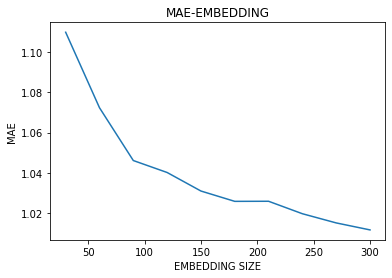

In [ ]:
size_mae(emb_size_min = 30, emb_size_max=300, step=30, num_epochs=10, df_test = df_test, df_train=df_train)

(75000, 300)
MAE: 1.0164817495082856, EMBEDDING SIZE: 300.0


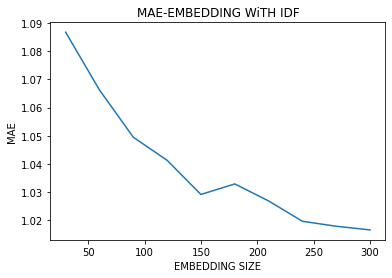

In [ ]:
size_mae_idf(emb_size_min = 30, emb_size_max=300, step=30, num_epochs=10, df_test = df_test, df_train=df_train)

Выводы:

Если сравнить усредненный word2vec с взвешенным по idf, то можно сказать, что качсетво на усредненном оказалось лучше(MAE на тесте меньше).Эксперимент с размером эмбеддингов показал, что с увеличением размера эмбеддингов MAE падает и для усредненных ворд2веков и для взвешенных с idf ворд2веков. Однако когда размер уже достаточно большой (здесь 250+) качество стабилизируется и снижение MAE замедляется. Все это логично, поскольку большие эмбеддинги дают нам лучшее представление слова, или же предложения, как у нас, однако после достижения какого-то размера эмбеддинга потенциала для лучшего векторного представления наших слов почти не остается. 

####Теперь попробуйте обучить логистическую регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.


In [ ]:
%%time
from tqdm.notebook import tqdm
model_fast_text = gensim.models.FastText(
        df_train['all_list'],
        size=300,
        window=5,
        min_count=2,
        workers=10,
        iter=100,
        )
model_fast_text.save("/content/drive/MyDrive/ИАД /ДЗ/fast_text.model")

CPU times: user 1h 5min 35s, sys: 11.6 s, total: 1h 5min 47s
Wall time: 33min 39s


In [ ]:
model_fast_text.save("/content/drive/MyDrive/ИАД /ДЗ/fast_text.model")

In [ ]:
all1 = []
for i in tqdm(df_train['all_list']):
  sentence= np.array([0]*300)
  cnt = 0
  for j in i:
    try:
      sentence = sentence + model_fast_text.wv[j]
      cnt +=1
    except:
      pass
  all1.append(sentence/cnt)
df_train['all_list_fast'] = all1

all1 = []
for i in tqdm(df_test['all_list']):
  sentence= np.array([0]*300)
  cnt = 0
  for j in i:
    try:
      sentence = sentence + model_fast_text.wv[j]
      cnt +=1
    except:
      pass
  all1.append(sentence/cnt)
df_test['all_list_fast'] = all1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
%%time
X_train_fast = np.matrix([i for i in df_train['all_list_fast']])
X_test_fast = np.matrix([i for i in df_test['all_list_fast']])
y_train = df_train['score']
y_test = df_test['score']

linreg_fast = LinearRegression()
linreg_fast.fit(pd.DataFrame(X_train_fast).fillna(0), y_train)
print('MAE: {}'.format(mae(y_test, linreg_fast.predict(pd.DataFrame(X_test_fast).fillna(0)))))

MAE: 0.9979750634786294
CPU times: user 4.54 s, sys: 989 ms, total: 5.53 s
Wall time: 3.66 s


Выводы:
Обученный за 100 эпох fasttext все еще проигрывает по MAE word2vec, который мы обучали меньшее количество эпох. При этом на обучение fasttext ушло значительно больше времени, чтоб MAE было меньше 1


### Часть 3. 6 баллов

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки. Получите ошибку меньше, чем во всех вышеперечисленных методах.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [13]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.nn.utils.rnn import pad_sequence

In [14]:
WORDS = set()
for sent in list(df['positive']):
    for w in sent:
        WORDS.add(w)
        
for sent in list(df['negative']):
    for w in sent:
        WORDS.add(w)

In [15]:
int2word = dict(enumerate(tuple(WORDS)))
word2int = {w: ii for ii, w in int2word.items()}

In [16]:
median = int(np.median(((df_train['all_list'].apply(len)))))
median

22

In [17]:
train_pos_pad = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:median]) for seq in df_train['all_list']], 
                           batch_first=True)

test_pos_pad = pad_sequence([torch.as_tensor([word2int[w] for w in seq][:median]) for seq in df_test['all_list']], 
                           batch_first=True)

In [18]:
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, df, pad):
        self.df = df
        self.pad = pad
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        pos_pad = self.pad
        y = self.df['score']
        return torch.tensor(pos_pad[idx]), torch.tensor(y[idx])

In [19]:
batch_size = 4

train_dataset = ReviewsDataset(df_train.reset_index(), train_pos_pad)
test_dataset = ReviewsDataset(df_test.reset_index(), test_pos_pad)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [29]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)

        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embed = self.embedding(x)
        lstm_out, hidden = self.lstm(embed, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden



In [30]:
def train(model, train_dataloader, test_dataloader, scheduler, device, optimizer, epochs, batch_size):
  model.train()
  counter = 0
  for i in range(epochs):
      h = model.init_hidden(batch_size)
      model.train()
      
      for batch in tqdm(train_dataloader):
          inputs, targets = batch
          counter += 1
          h = tuple([e.data for e in h])
          inputs, targets = inputs.to(device), targets.to(device)
          model.zero_grad()
          output, h = model(inputs, h)
          loss = criterion(output.squeeze(), targets)
          loss.backward()
          nn.utils.clip_grad_norm_(model.parameters(), 5)
          optimizer.step()
          if counter % 1000 == 0:
              print('Last train loss:', loss.item())

      with torch.no_grad():
          model.eval() 
          test_pred = []
          test_h = model.init_hidden(batch_size)
          for batch in tqdm(test_dataloader):
                    inputs, targets = batch
                    test_h = tuple([each.data for each in test_h])
                    inputs, targets = inputs.to(device), targets.to(device)
                    output, test_h = model(inputs, test_h)
                    test_pred.append(output.detach())
          pred = []
          for k in tqdm(test_pred):
            for j in k:
              pred.append(j.to('cpu').detach().item())
          print("Epoch:{}".format(i+1))
          print('MAE TEST:{}'.format(mae(np.array(pred), np.array(df_test['score']))))
      scheduler.step()

In [31]:
vocab_size = len(WORDS)
output_size = 1
embedding_dim = 300
hidden_dim = 512
n_layers = 3

model = Net(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to('cuda')
print(model)


Net(
  (embedding): Embedding(29986, 300)
  (lstm): LSTM(300, 512, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)


In [34]:
epochs = 5
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
device = 'cuda'
lmbda = lambda epoch: 0.5
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)

In [35]:
train(model, train_dataloader, test_dataloader, scheduler, device, optimizer, epochs = 5, batch_size = 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


Last train loss: 0.5732338190078736
Last train loss: 0.8233279705047605
Last train loss: 0.6601379394531248
Last train loss: 0.702444887161255
Last train loss: 1.204561328887939
Last train loss: 2.0813690662384037
Last train loss: 0.7646171331405642
Last train loss: 0.39942944049835205
Last train loss: 1.6434441566467284
Last train loss: 0.7393332481384278
Last train loss: 0.5022733211517334
Last train loss: 0.6174107551574706
Last train loss: 0.8961123466491698
Last train loss: 1.0791999816894533
Last train loss: 1.242258024215698
Last train loss: 0.6031997442245483
Last train loss: 0.45785667896270765
Last train loss: 0.5464653015136718




Epoch:1
MAE TEST:0.9616051573753357


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


Last train loss: 1.5959768295288086
Last train loss: 1.5313693284988403
Last train loss: 0.881076955795288
Last train loss: 0.938527321815491
Last train loss: 1.1467306137084956
Last train loss: 0.4996083736419681
Last train loss: 0.3824552297592161
Last train loss: 0.5902919769287107
Last train loss: 1.169127345085144
Last train loss: 0.4894296646118166
Last train loss: 1.2360082626342772
Last train loss: 1.3085619449615478
Last train loss: 0.7807299375534056
Last train loss: 1.742531967163086
Last train loss: 0.7248837947845459
Last train loss: 1.0180914640426637
Last train loss: 0.7254267692565919
Last train loss: 1.071972608566284
Last train loss: 0.5382196187973021




Epoch:2
MAE TEST:0.9074818252334594


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


Last train loss: 1.0315536975860597
Last train loss: 1.0907042503356934
Last train loss: 1.0744683265686035
Last train loss: 0.605461597442627
Last train loss: 1.054386043548584
Last train loss: 1.3940140724182128
Last train loss: 0.8185362339019777
Last train loss: 0.46770009994506845
Last train loss: 0.6724838495254515
Last train loss: 1.2327279090881345
Last train loss: 0.7846238136291503
Last train loss: 0.863942527770996
Last train loss: 0.6557756900787353
Last train loss: 0.36284368038177495
Last train loss: 0.5995934724807737
Last train loss: 0.17134342193603525
Last train loss: 0.6094733715057372
Last train loss: 0.5412322521209718
Last train loss: 0.281196212768555




Epoch:3
MAE TEST:0.9002591954650878


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


Last train loss: 0.4179069519042966
Last train loss: 0.6698741912841797
Last train loss: 1.5243598461151122
Last train loss: 0.8377382516860963
Last train loss: 0.6088379144668579
Last train loss: 0.6205189228057861
Last train loss: 0.4202209949493403
Last train loss: 1.3227989673614498
Last train loss: 0.32760930061340354
Last train loss: 0.7737308979034423
Last train loss: 0.380149245262146
Last train loss: 0.7199798107147215
Last train loss: 0.7592241287231443
Last train loss: 0.27189183235168457
Last train loss: 0.48351421356201185
Last train loss: 0.8947686672210691
Last train loss: 1.086023807525635
Last train loss: 1.1172904253005984
Last train loss: 0.9190002202987673




Epoch:4
MAE TEST:0.8945924510688782


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


Last train loss: 0.28817830085754403
Last train loss: 0.6751718044281003
Last train loss: 0.47704141139984113
Last train loss: 0.9045032024383546
Last train loss: 0.9442049264907837
Last train loss: 1.0445741653442384
Last train loss: 1.0101915359497071
Last train loss: 0.20947260856628436
Last train loss: 1.1137942790985107
Last train loss: 0.6402212142944337
Last train loss: 0.21223664283752441
Last train loss: 0.5321515321731567
Last train loss: 1.0301630735397338
Last train loss: 0.4177765369415285
Last train loss: 1.241405653953552
Last train loss: 0.1361418247222903
Last train loss: 0.660546660423279
Last train loss: 0.3401192665100097




Epoch:5
MAE TEST:0.8929553177986144


In [36]:
#еще раз убедимся, что все работает
with torch.no_grad():
    model.eval() 
    test_pred = []
    test_h = model.init_hidden(batch_size)
    for batch in tqdm(test_dataloader):
              inputs, targets = batch
              test_h = tuple([each.data for each in test_h])
              inputs, targets = inputs.to(device), targets.to(device)
              output, test_h = model(inputs, test_h)
              test_pred.append(output.detach())
    pred = []
    for k in test_pred:
      for j in k:
        pred.append(j.to('cpu').detach().item())
print('MAE TEST:{}'.format(mae(np.array(pred), np.array(df_test['score']))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':



MAE TEST:0.8929553177986144


Источники вдохновения:


*   Семинар 10
*   https://www.kaggle.com/gabrielloye/simple-lstm-using-pytorch
*   https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py
*   https://radimrehurek.com/gensim/models/word2vec.html



### Бонус. 10 баллов

Побейте качество 0.75 в [соревновании](https://www.kaggle.com/c/hseds-texts-2020/leaderboard). Можете воспользоваться вышеперечисленными методами или попробовать что-нибудь еще.